## Using Dual moving average crossover strategy

# Import

In [284]:
# importing all the required libraries 
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
# used to access stock data using pandas
import pandas_datareader.data as web
import pandas_datareader


In [285]:
# select the start date and end date for analysis
start=datetime.datetime(2018,10,1)
end=datetime.datetime(2020,7,25)

In [303]:
# enter the stock symbol
STOCK=web.DataReader('BAC','yahoo',start,end)

In [304]:
# displaying sample data
STOCK

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-10-01,29.940001,29.540001,29.680000,29.650000,53900900.0,28.448154
2018-10-02,29.719999,29.270000,29.580000,29.580000,42940300.0,28.380993
2018-10-03,30.180000,29.719999,29.809999,30.000000,61080300.0,28.783966
2018-10-04,30.790001,30.139999,30.170000,30.430000,72325700.0,29.196539
2018-10-05,30.650000,30.049999,30.600000,30.230000,51931000.0,29.004644
...,...,...,...,...,...,...
2020-07-20,23.700001,23.110001,23.190001,23.580000,61114000.0,23.580000
2020-07-21,24.480000,23.690001,23.709999,24.420000,75546100.0,24.420000
2020-07-22,24.330000,23.969999,24.240000,24.309999,52193700.0,24.309999


# Visualize the date

In [305]:
# Createing a moving average 
# moving average helps to find a average of a certain time intervals
STOCK['MA30']=STOCK['Close'].rolling(7).mean()
STOCK['MA100']=STOCK['Close'].rolling(30).mean()


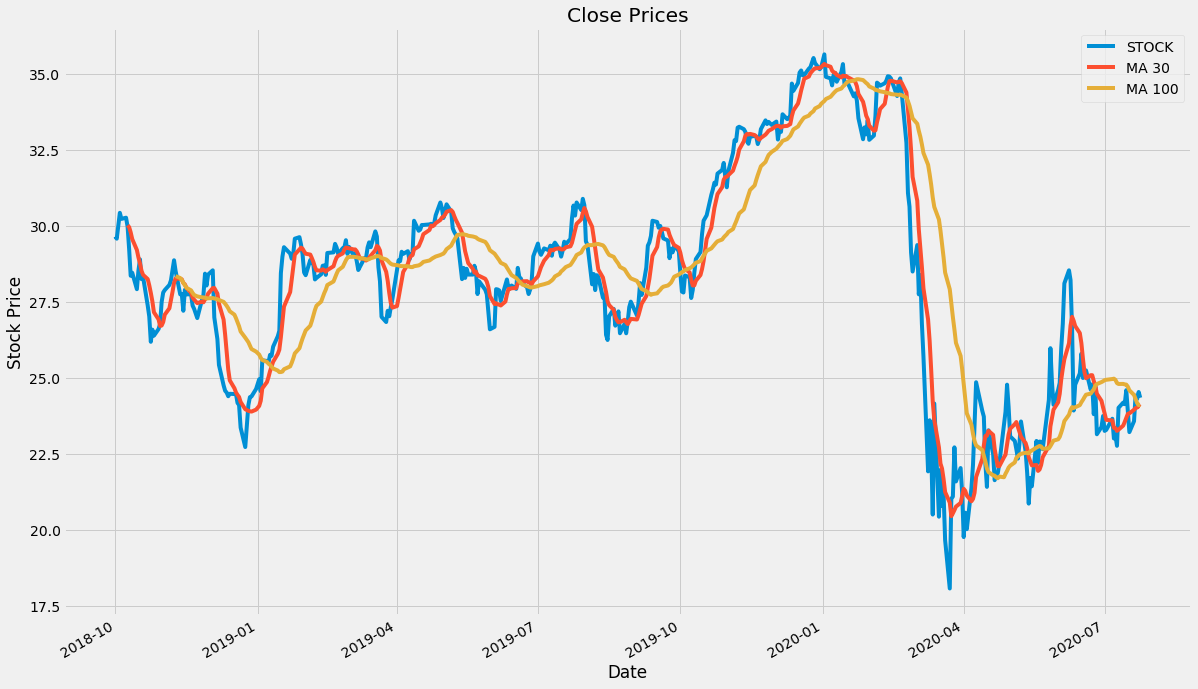

In [306]:
# Plotting in graph
plt.figure(figsize=(18,12))
plt.title("Close Prices")
STOCK['Close'].plot(label="STOCK")
STOCK['MA30'].plot(label="MA 30")
STOCK['MA100'].plot(label="MA 100")
plt.ylabel('Stock Price')

plt.legend()

In [307]:
# Creating a new dataframe that will store the close price, moving average of 30 and 100 days
# This data will be used for the average crossover strategy
data = STOCK.filter(['Close','MA30','MA100'], axis=1)


In [308]:
#Creating a function that lets the user when to buy and sell
def buy_sell(data):
    sigBuy=[]
    sigSell=[]
    flag=-1
    
    for i in range(len(data)):
        if data['MA30'][i]>data['MA100'][i]:
            if flag!=1:
                sigBuy.append(data['Close'][i])
                sigSell.append(np.nan)
                flag=1
            else:
                sigBuy.append(np.nan)
                sigSell.append(np.nan)
                
        elif data['MA30'][i]<data['MA100'][i]:
            if flag!=-1:
                sigBuy.append(np.nan)
                sigSell.append(data['Close'][i])
                flag=-1
            else:
                sigBuy.append(np.nan)
                sigSell.append(np.nan)
        else:
            sigBuy.append(np.nan)
            sigSell.append(np.nan)
            
    return(sigBuy,sigSell)

In [309]:
# Creating a buy and sell signal variable
data['Buy_Signal'],data['Sell_Signal']=buy_sell(data)

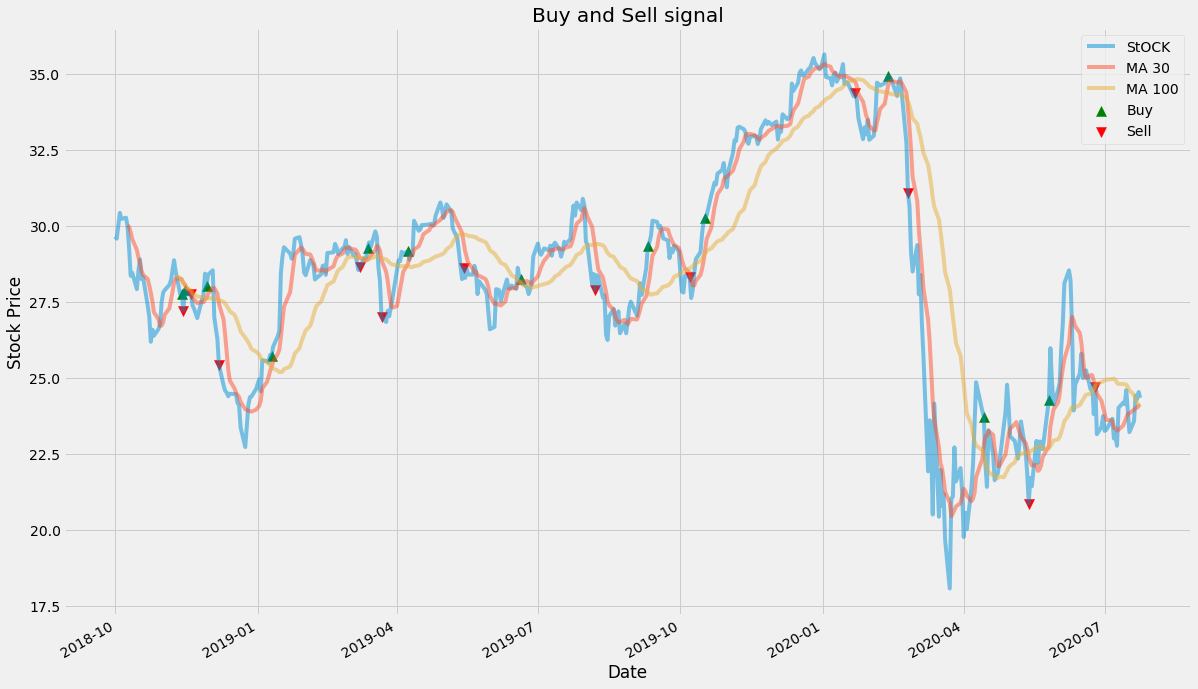

In [311]:
# Visualize the data and the strategy
# Plotting in graph
plt.figure(figsize=(18,12))
plt.title("Buy and Sell signal")
STOCK['Close'].plot(label="StOCK",alpha=0.5)
STOCK['MA30'].plot(label="MA 30",alpha=0.5)
STOCK['MA100'].plot(label="MA 100",alpha=0.5)
plt.ylabel('Stock Price')
plt.scatter(data.index,data['Buy_Signal'],label='Buy',marker='^',color='green',s=100)
plt.scatter(data.index,data['Sell_Signal'],label='Sell',marker='v',color='red',s=100)
plt.legend()
plt.show()

# Building a portfolio tracker

In [312]:

data['Buy_Signal']=data['Buy_Signal'].fillna(0)
data['Sell_Signal']=data['Sell_Signal'].fillna(0)

In [313]:
# Function to calculate profit and loss
def portfolio(money):
    
    budget=money
    buy=[]
    sell=[]
    for i in range(len(data)):
        
        budget=budget-data['Buy_Signal'][i]
        budget=budget+data['Sell_Signal'][i]
        
        if (data['Buy_Signal'][i]!=0):
            buy.append(data['Buy_Signal'][i])
        if (data['Sell_Signal'][i]!=0):
            sell.append(data['Sell_Signal'][i])
            
    return budget, buy, sell




## Portfolio data

In [314]:
No_of_stock=100
starting_balance=1000
profit_loss,x,y=portfolio(starting_balance)
if (len(x)>len(y)):
    profit_loss=profit_loss+STOCK['Close'][-1]

if (profit_loss>starting_balance):    
    profit=(profit_loss-starting_balance)*No_of_stock
    print("Profit= ",profit)
    print("My Total Balance= ", starting_balance+profit)
else:
    loss=(starting_balance-profit_loss)*No_of_stock
    print("Loss= ",loss)
    print("My Total Balance= ", starting_balance-loss)
    


Loss=  680.000114440918
My Total Balance=  319.99988555908203
